In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [64]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [65]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [66]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [67]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [68]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [69]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [70]:
filter2 = df_temp['최저기온(℃)'].isna() == True
df_temp['최저기온(℃)'][filter2] = 7.15625

In [71]:
df_korea = df_korea.reset_index()

In [72]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

In [73]:
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 3)

In [74]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [75]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

In [76]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 3)

In [77]:
x_train = []
y_train = []
time_step = 60
n_col = 3

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888, 0.31922063, 0.28660807],
       [0.29945554, 0.29607384, 0.3198272 ],
       [0.25937689, 0.25388222, 0.26530612],
       [0.10027223, 0.10108409, 0.08580366],
       [0.02510587, 0.04731907, 0.        ],
       [0.24319419, 0.25754468, 0.20527335],
       [0.22837266, 0.23513038, 0.23596008],
       [0.23835451, 0.25388222, 0.23447043],
       [0.17211131, 0.16319953, 0.18948309],
       [0.20220811, 0.21432757, 0.19603754],
       [0.23275862, 0.25212423, 0.2215105 ],
       [0.33318209, 0.35159684, 0.2919708 ],
       [0.15366001, 0.17096396, 0.17488455],
       [0.09195402, 0.10225608, 0.10859526],
       [0.06488203, 0.05288602, 0.09742291],
       [0.05792498, 0.08980369, 0.04856249],
       [0.0738052 , 0.09449165, 0.07239684],
       [0.12885662, 0.18678582, 0.1084463 ],
       [0.17029643, 0.20773513, 0.16803218],
       [0.1822444 , 0.22121301, 0.17116043],
       [0.22081065, 0.27175505, 0.194101  ],
       [0.28055051, 0.32390858, 0.248

60 1039
60 1040
60 1041
60 1042
60 1043
60 1044
60 1045
60 1046
60 1047
60 1048
60 1049
60 1050
60 1051
60 1052
60 1053
60 1054
60 1055
60 1056
60 1057
60 1058
60 1059
60 1060
60 1061
60 1062
60 1063
60 1064
60 1065
60 1066
60 1067
60 1068
60 1069
60 1070
60 1071
60 1072
60 1073
60 1074
60 1075
60 1076
60 1077
60 1078
60 1079
60 1080
60 1081
60 1082
60 1083
60 1084
60 1085
60 1086
60 1087
60 1088
60 1089
60 1090
60 1091
60 1092
60 1093
60 1094
60 1095
60 1096
60 1097
60 1098
60 1099
60 1100
60 1101
60 1102
60 1103
60 1104
60 1105
60 1106
60 1107
60 1108
60 1109
60 1110
60 1111
60 1112
60 1113
60 1114
60 1115
60 1116
60 1117
60 1118
60 1119
60 1120
60 1121
60 1122
60 1123
60 1124
60 1125
60 1126
60 1127
60 1128
60 1129
60 1130
60 1131
60 1132
60 1133
60 1134
60 1135
60 1136
60 1137
60 1138
60 1139
60 1140
60 1141
60 1142
60 1143
60 1144
60 1145
60 1146
60 1147
60 1148
60 1149
60 1150
60 1151
60 1152
60 1153
60 1154
60 1155
60 1156
60 1157
60 1158
60 1159
60 1160
60 1161
60 1162
60 1163


60 4309
60 4310
60 4311
60 4312
60 4313
60 4314
60 4315
60 4316
60 4317
60 4318
60 4319
60 4320
60 4321
60 4322
60 4323
60 4324
60 4325
60 4326
60 4327
60 4328
60 4329
60 4330
60 4331
60 4332
60 4333
60 4334
60 4335
60 4336
60 4337
60 4338
60 4339
60 4340
60 4341
60 4342
60 4343
60 4344
60 4345
60 4346
60 4347
60 4348
60 4349
60 4350
60 4351
60 4352
60 4353
60 4354
60 4355
60 4356
60 4357
60 4358
60 4359
60 4360
60 4361
60 4362
60 4363
60 4364
60 4365
60 4366
60 4367
60 4368
60 4369
60 4370
60 4371
60 4372
60 4373
60 4374
60 4375
60 4376
60 4377
60 4378
60 4379
60 4380
60 4381
60 4382
60 4383
60 4384
60 4385
60 4386
60 4387
60 4388
60 4389
60 4390
60 4391
60 4392
60 4393
60 4394
60 4395
60 4396
60 4397
60 4398
60 4399
60 4400
60 4401
60 4402
60 4403
60 4404
60 4405
60 4406
60 4407
60 4408
60 4409
60 4410
60 4411
60 4412
60 4413
60 4414
60 4415
60 4416
60 4417
60 4418
60 4419
60 4420
60 4421
60 4422
60 4423
60 4424
60 4425
60 4426
60 4427
60 4428
60 4429
60 4430
60 4431
60 4432
60 4433


60 8303
60 8304
60 8305
60 8306
60 8307
60 8308
60 8309
60 8310
60 8311
60 8312
60 8313
60 8314
60 8315
60 8316
60 8317
60 8318
60 8319
60 8320
60 8321
60 8322
60 8323
60 8324
60 8325
60 8326
60 8327
60 8328
60 8329
60 8330
60 8331
60 8332
60 8333
60 8334
60 8335
60 8336
60 8337
60 8338
60 8339
60 8340
60 8341
60 8342
60 8343
60 8344
60 8345
60 8346
60 8347
60 8348
60 8349
60 8350
60 8351
60 8352
60 8353
60 8354
60 8355
60 8356
60 8357
60 8358
60 8359
60 8360
60 8361
60 8362
60 8363
60 8364
60 8365
60 8366
60 8367
60 8368
60 8369
60 8370
60 8371
60 8372
60 8373
60 8374
60 8375
60 8376
60 8377
60 8378
60 8379
60 8380
60 8381
60 8382
60 8383
60 8384
60 8385
60 8386
60 8387
60 8388
60 8389
60 8390
60 8391
60 8392
60 8393
60 8394
60 8395
60 8396
60 8397
60 8398
60 8399
60 8400
60 8401
60 8402
60 8403
60 8404
60 8405
60 8406
60 8407
60 8408
60 8409
60 8410
60 8411
60 8412
60 8413
60 8414
60 8415
60 8416
60 8417
60 8418
60 8419
60 8420
60 8421
60 8422
60 8423
60 8424
60 8425
60 8426
60 8427


60 11989
60 11990
60 11991
60 11992
60 11993
60 11994
60 11995
60 11996
60 11997
60 11998
60 11999
60 12000
60 12001
60 12002
60 12003
60 12004
60 12005
60 12006
60 12007
60 12008
60 12009
60 12010
60 12011
60 12012
60 12013
60 12014
60 12015
60 12016
60 12017
60 12018
60 12019
60 12020
60 12021
60 12022
60 12023
60 12024
60 12025
60 12026
60 12027
60 12028
60 12029
60 12030
60 12031
60 12032
60 12033
60 12034
60 12035
60 12036
60 12037
60 12038
60 12039
60 12040
60 12041
60 12042
60 12043
60 12044
60 12045
60 12046
60 12047
60 12048
60 12049
60 12050
60 12051
60 12052
60 12053
60 12054
60 12055
60 12056
60 12057
60 12058
60 12059
60 12060
60 12061
60 12062
60 12063
60 12064
60 12065
60 12066
60 12067
60 12068
60 12069
60 12070
60 12071
60 12072
60 12073
60 12074
60 12075
60 12076
60 12077
60 12078
60 12079
60 12080
60 12081
60 12082
60 12083
60 12084
60 12085
60 12086
60 12087
60 12088
60 12089
60 12090
60 12091
60 12092
60 12093
60 12094
60 12095
60 12096
60 12097
60 12098
60 12099
6

60 15470
60 15471
60 15472
60 15473
60 15474
60 15475
60 15476
60 15477
60 15478
60 15479
60 15480
60 15481
60 15482
60 15483
60 15484
60 15485
60 15486
60 15487
60 15488
60 15489
60 15490
60 15491
60 15492
60 15493
60 15494
60 15495
60 15496
60 15497
60 15498
60 15499
60 15500
60 15501
60 15502
60 15503
60 15504
60 15505
60 15506
60 15507
60 15508
60 15509
60 15510
60 15511
60 15512
60 15513
60 15514
60 15515
60 15516
60 15517
60 15518
60 15519
60 15520
60 15521
60 15522
60 15523
60 15524
60 15525
60 15526
60 15527
60 15528
60 15529
60 15530
60 15531
60 15532
60 15533
60 15534
60 15535
60 15536
60 15537
60 15538
60 15539
60 15540
60 15541
60 15542
60 15543
60 15544
60 15545
60 15546
60 15547
60 15548
60 15549
60 15550
60 15551
60 15552
60 15553
60 15554
60 15555
60 15556
60 15557
60 15558
60 15559
60 15560
60 15561
60 15562
60 15563
60 15564
60 15565
60 15566
60 15567
60 15568
60 15569
60 15570
60 15571
60 15572
60 15573
60 15574
60 15575
60 15576
60 15577
60 15578
60 15579
60 15580
6

60 19180
60 19181
60 19182
60 19183
60 19184
60 19185
60 19186
60 19187
60 19188
60 19189
60 19190
60 19191
60 19192
60 19193
60 19194
60 19195
60 19196
60 19197
60 19198
60 19199
60 19200
60 19201
60 19202
60 19203
60 19204
60 19205
60 19206
60 19207
60 19208
60 19209
60 19210
60 19211
60 19212
60 19213
60 19214
60 19215
60 19216
60 19217
60 19218
60 19219
60 19220
60 19221
60 19222
60 19223
60 19224
60 19225
60 19226
60 19227
60 19228
60 19229
60 19230
60 19231
60 19232
60 19233
60 19234
60 19235
60 19236
60 19237
60 19238
60 19239
60 19240
60 19241
60 19242
60 19243
60 19244
60 19245
60 19246
60 19247
60 19248
60 19249
60 19250
60 19251
60 19252
60 19253
60 19254
60 19255
60 19256
60 19257
60 19258
60 19259
60 19260
60 19261
60 19262
60 19263
60 19264
60 19265
60 19266
60 19267
60 19268
60 19269
60 19270
60 19271
60 19272
60 19273
60 19274
60 19275
60 19276
60 19277
60 19278
60 19279
60 19280
60 19281
60 19282
60 19283
60 19284
60 19285
60 19286
60 19287
60 19288
60 19289
60 19290
6

In [78]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [79]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [80]:
x_train.shape, y_train.shape

((19525, 60, 3), (19525, 3))

In [81]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True, kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10800     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 42,899
Trainable params: 42,899
Non-trainable params: 0
_________________________________________________________________


In [82]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [83]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
611/611 [==============================] - 14s 21ms/step - loss: 0.0527 - mae: 0.0819
Epoch 2/30
611/611 [==============================] - 12s 20ms/step - loss: 0.0146 - mae: 0.0646
Epoch 3/30
611/611 [==============================] - 13s 21ms/step - loss: 0.0111 - mae: 0.0629
Epoch 4/30
611/611 [==============================] - 13s 21ms/step - loss: 0.0097 - mae: 0.0621
Epoch 5/30
611/611 [==============================] - 13s 21ms/step - loss: 0.0089 - mae: 0.0615
Epoch 6/30
611/611 [==============================] - 13s 20ms/step - loss: 0.0083 - mae: 0.0607
Epoch 7/30
611/611 [==============================] - 13s 20ms/step - loss: 0.0079 - mae: 0.0599
Epoch 8/30
611/611 [==============================] - 12s 20ms/step - loss: 0.0075 - mae: 0.0590
Epoch 9/30
611/611 [==============================] - 12s 20ms/step - loss: 0.0073 - mae: 0.0590
Epoch 10/30
611/611 [==============================] - 12s 20ms/step - loss: 0.0071 - mae: 0.0585
Epoch 11/30
611/611 [========

# 건들지 마시오

Text(0, 0.5, 'Losses')

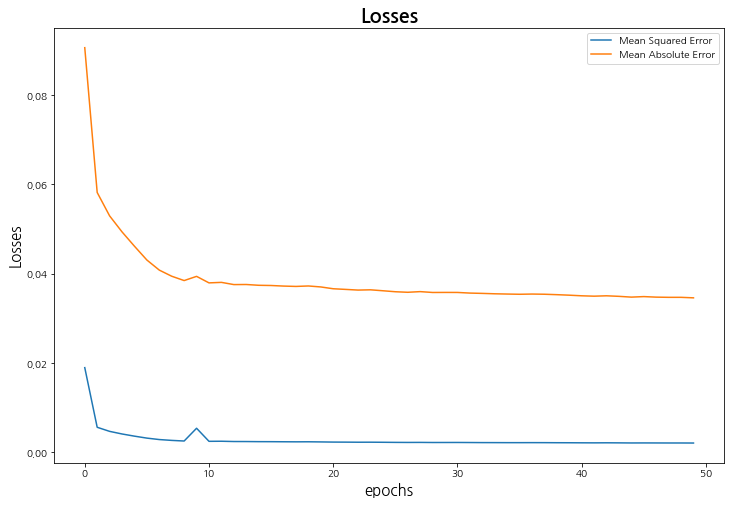

In [153]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [155]:
m_lstm_RMSprop = tf.keras.models.load_model('m4_lstm_RMSprop.h5')

In [154]:
# 8/25 loss율 엄청 좋음
m_lstm.save('m4_lstm_RMSprop.h5')

# 건들지 마시오

Text(0, 0.5, 'Losses')

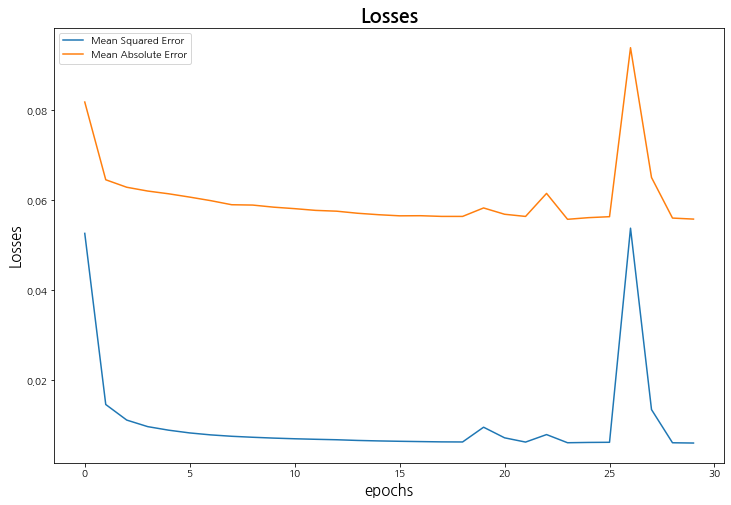

In [84]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [85]:
#8/30
m_lstm.save('m5_lstm_RMSprop.h5')

In [86]:
m_lstm_RMSprop = tf.keras.models.load_model('m5_lstm_RMSprop.h5')

In [87]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.38793103, 0.42836214, 0.31580515],
        [0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        ...,
        [0.33076225, 0.333431  , 0.32518993],
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414]],

       [[0.49213551, 0.4557574 , 0.50856547],
        [0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        ...,
        [0.32410768, 0.31526516, 0.34083122],
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375]],

       [[0.3008167 , 0.35174333, 0.28407567],
        [0.1991833 , 0.19425725, 0.2367049 ],
        [0.21279492, 0.21432757, 0.22344704],
        ...,
        [0.42301875, 0.4890126 , 0.31163414],
        [0.53962492, 0.58804571, 0.50737375],
        [0.38430127, 0.38397304, 0.39267094]],

       ...,

       [[0.77208106, 0.77234105, 0.7729778 ],
        [0.77283727, 0.77658951, 0.75495308],
        [0.82320024, 0

In [88]:
m_lstm_RMSprop.evaluate(x_test, y_test)

154/154 [==============================] - 1s 6ms/step - loss: 0.0056 - mae: 0.0531


[0.005576661322265863, 0.05309335142374039]

In [89]:
pred = m_lstm_RMSprop.predict(x_test)
pred

154/154 [==============================] - 1s 6ms/step


array([[0.46995175, 0.48545218, 0.4499393 ],
       [0.4702346 , 0.4857363 , 0.45020026],
       [0.4699867 , 0.48548523, 0.44997138],
       ...,
       [0.88262653, 0.8591546 , 0.8927858 ],
       [0.8747755 , 0.8527051 , 0.88340235],
       [0.8713745 , 0.8499017 , 0.8793422 ]], dtype=float32)

In [90]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 3)


array([[ 8.914506, 13.960604,  4.315266],
       [ 8.926195, 13.972726,  4.326215],
       [ 8.915951, 13.962014,  4.316612],
       ...,
       [25.96829 , 29.903683, 22.895443],
       [25.643848, 29.628532, 22.501749],
       [25.5033  , 29.50893 , 22.331402]], dtype=float32)

In [91]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ,  6.725  ],
       [ 5.375  ,  9.63125,  1.9125 ],
       [ 5.3625 ,  8.70625,  2.075  ],
       ...,
       [26.8875 , 31.00625, 23.51875],
       [27.4    , 31.6625 , 24.34375],
       [27.2375 , 31.2125 , 24.2125 ]])

In [92]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [93]:
pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

#pred.columns = ['예측평균기온', '예측최고기온']
#y_test.columns = ['실제평균기온', '실제최고기온']

In [94]:
df_pred = pd.concat((pred, y_test), axis = 1)
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

,예측평균기온,실제평균기온,예측최고기온,실제최고기온,예측최저기온,실제최저기온
0,8.914506,11.79375,13.960604,18.33750,4.315266,6.72500
1,8.926195,5.37500,13.972726,9.63125,4.326215,1.91250
2,8.915951,5.36250,13.962014,8.70625,4.316612,2.07500
3,8.877669,7.25625,13.922077,11.08125,4.280730,4.09375
4,8.841839,8.90625,13.884696,12.89375,4.247145,5.36250
...,...,...,...,...,...,...
4892,27.045013,26.24375,30.815447,29.97500,24.202635,22.85625
4893,26.472939,25.86250,30.331150,29.23125,23.508051,23.14375
4894,25.968290,26.88750,29.903683,31.00625,22.895443,23.51875
4895,25.643848,27.40000,29.628532,31.66250,22.501749,24.34375


Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


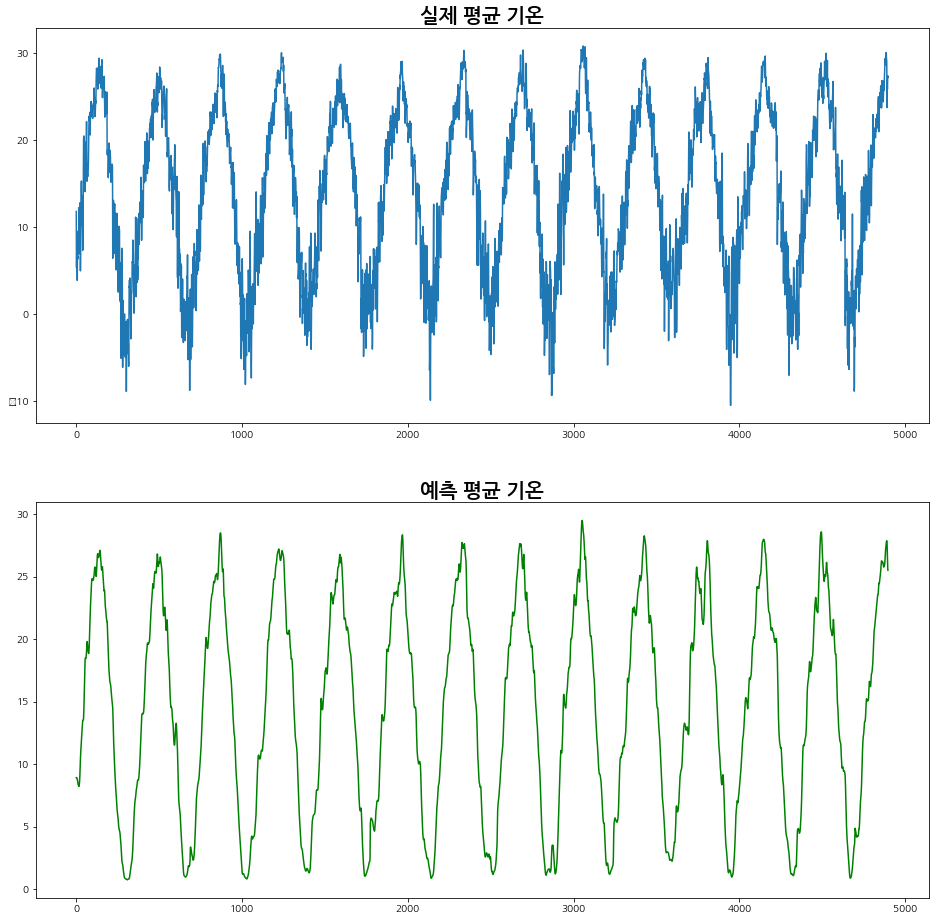

In [95]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

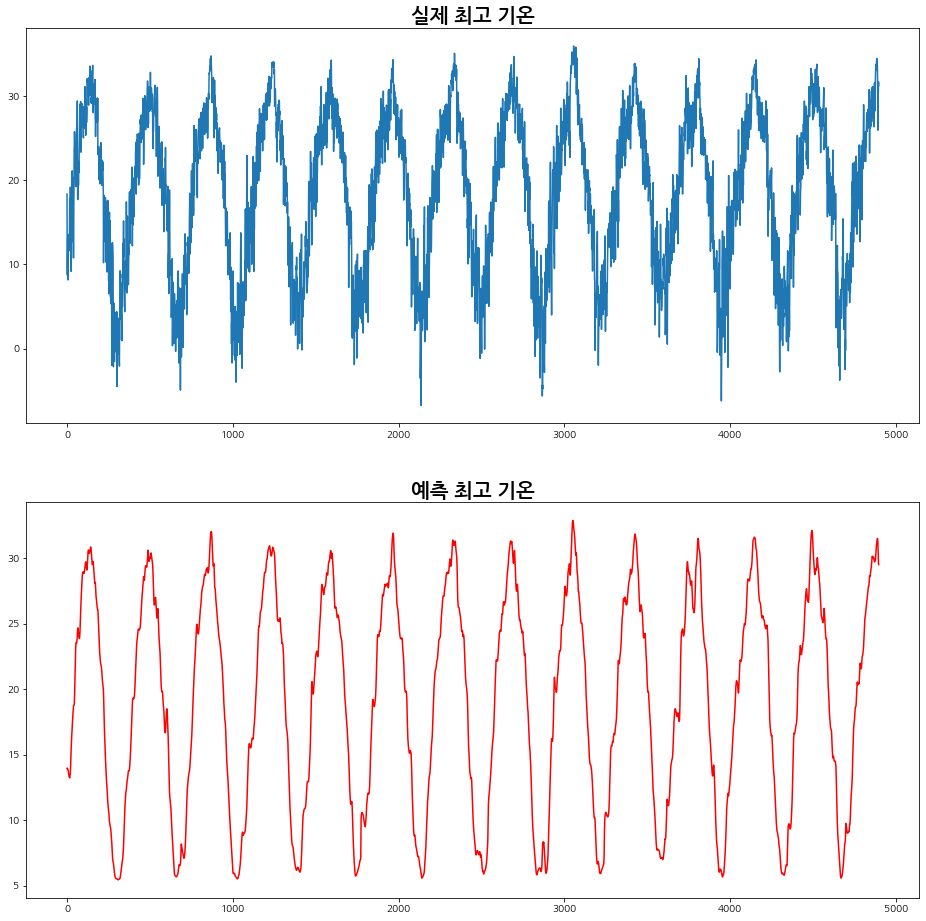

In [96]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최저 기온')

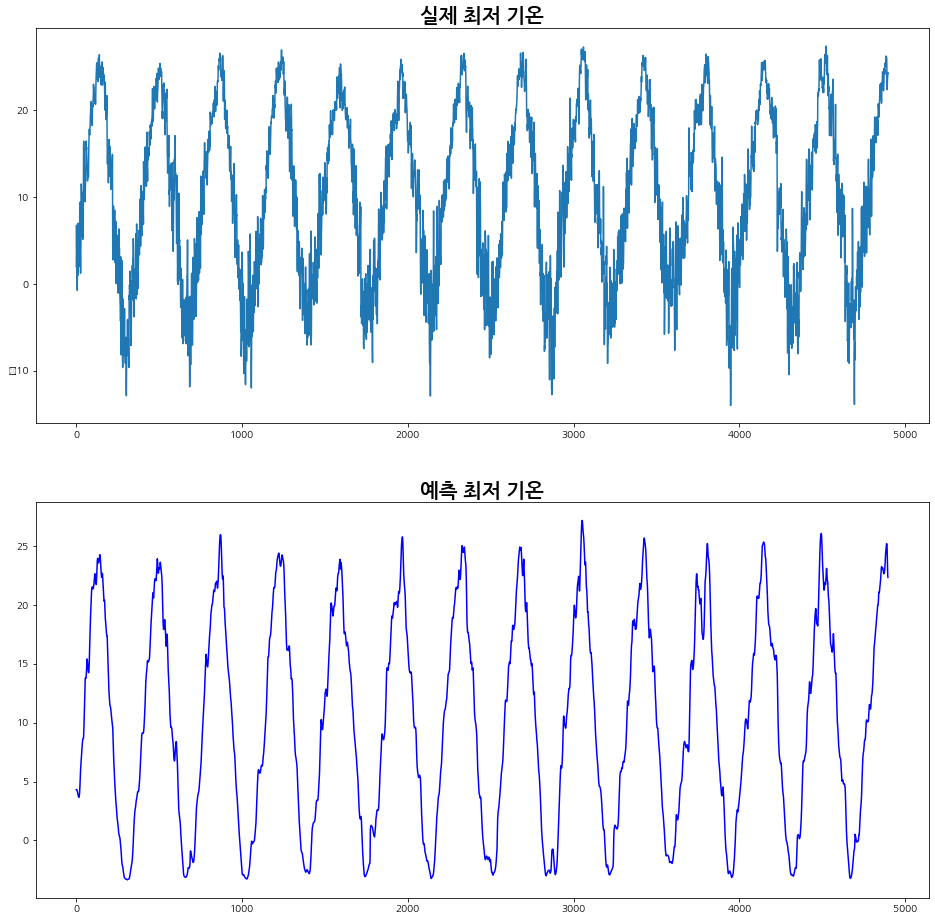

In [97]:

fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')


In [98]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2025-08-15
730


In [99]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335, 0.7738715924325935]

In [100]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.82320024, 0.8448579 , 0.77387159],
       [0.84664247, 0.86595371, 0.81438999],
       [0.85012099, 0.86346323, 0.84120363],
       [0.85904416, 0.87884559, 0.8286906 ],
       [0.81261343, 0.77981248, 0.82809474],
       [0.76149425, 0.70216818, 0.80470728],
       [0.80490018, 0.7890419 , 0.80902726],
       [0.82698125, 0.82127161, 0.82064651],
       [0.8399879 , 0.84207442, 0.83345747],
       [0.84497883, 0.83899795, 0.83837331],
       [0.83514822, 0.77131556, 0.85282288],
       [0.87008469, 0.84837386, 0.87308208],
       [0.84694495, 0.81380018, 0.85297185],
       [0.85344828, 0.78757691, 0.89423507],
       [0.82879613, 0.777322  , 0.87546551],
       [0.86358137, 0.85701729, 0.86757039],
       [0.88384755, 0.87503662, 0.88559511],
       [0.888536  , 0.87283914, 0.89393714],
       [0.85269208, 0.7998828 , 0.89810815],
       [0.87265578, 0.8444184 , 0.88559511],
       [0.88944344, 0.88397304, 0.87099657],
       [0.82758621, 0.7998828 , 0.84299121],
       [0.

In [101]:
for i in range(time_step, d_day + time_step):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_RMSprop.predict(array)[0]))
    print(len(last_array))

60 60
[[0.82320024 0.8448579  0.77387159]
 [0.84664247 0.86595371 0.81438999]
 [0.85012099 0.86346323 0.84120363]
 [0.85904416 0.87884559 0.8286906 ]
 [0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.7947553

1/1 [==============================] - 0s 14ms/step
64
60 64
[[0.81261343 0.77981248 0.82809474]
 [0.76149425 0.70216818 0.80470728]
 [0.80490018 0.7890419  0.80902726]
 [0.82698125 0.82127161 0.82064651]
 [0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0

1/1 [==============================] - 0s 14ms/step
68
60 68
[[0.8399879  0.84207442 0.83345747]
 [0.84497883 0.83899795 0.83837331]
 [0.83514822 0.77131556 0.85282288]
 [0.87008469 0.84837386 0.87308208]
 [0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0

1/1 [==============================] - 0s 14ms/step
72
60 72
[[0.84694495 0.81380018 0.85297185]
 [0.85344828 0.78757691 0.89423507]
 [0.82879613 0.777322   0.87546551]
 [0.86358137 0.85701729 0.86757039]
 [0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0

1/1 [==============================] - 0s 14ms/step
76
60 76
[[0.88384755 0.87503662 0.88559511]
 [0.888536   0.87283914 0.89393714]
 [0.85269208 0.7998828  0.89810815]
 [0.87265578 0.8444184  0.88559511]
 [0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0

1/1 [==============================] - 0s 16ms/step
80
60 80
[[0.88944344 0.88397304 0.87099657]
 [0.82758621 0.7998828  0.84299121]
 [0.83064126 0.80706124 0.84909876]
 [0.87341198 0.83621447 0.88812751]
 [0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0

1/1 [==============================] - 0s 15ms/step
84
60 84
[[0.90381125 0.88734251 0.89840608]
 [0.85949788 0.81292118 0.89259645]
 [0.88732607 0.85833577 0.90719499]
 [0.87855414 0.79475535 0.92387904]
 [0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0

1/1 [==============================] - 0s 14ms/step
88
60 88
[[0.87068966 0.7884559  0.92909281]
 [0.87114338 0.7998828  0.90942947]
 [0.84951603 0.79856431 0.89468196]
 [0.88551119 0.86214474 0.90987636]
 [0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0

1/1 [==============================] - 0s 17ms/step
92
60 92
[[0.84467635 0.77527102 0.89483093]
 [0.86584997 0.84192792 0.87695516]
 [0.88067151 0.86170524 0.87918963]
 [0.90229885 0.89774392 0.89393714]
 [0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0

1/1 [==============================] - 0s 18ms/step
96
60 96
[[0.87598306 0.84060943 0.89617161]
 [0.88808227 0.81878113 0.93862655]
 [0.89337568 0.86199824 0.92432593]
 [0.90804598 0.87401113 0.93505139]
 [0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0

1/1 [==============================] - 0s 15ms/step
100
60 100
[[0.92075015 0.90301787 0.93490243]
 [0.93965517 0.92719016 0.92238939]
 [0.95447671 0.93788456 0.94667064]
 [0.96521476 0.94828597 0.95292716]
 [0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 

1/1 [==============================] - 0s 16ms/step
104
60 104
[[0.95251059 0.94696748 0.94711753]
 [0.94797338 0.93173161 0.94369135]
 [0.96264368 0.95077644 0.94890511]
 [0.9661222  0.95150894 0.96097125]
 [0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 

1/1 [==============================] - 0s 18ms/step
108
60 108
[[0.97595281 0.96513331 0.9594816 ]
 [0.9807925  0.96498682 0.97244153]
 [0.98200242 0.96501611 0.9700581 ]
 [0.96581972 0.94813947 0.97050499]
 [0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 

1/1 [==============================] - 0s 18ms/step
112
60 112
[[0.96294616 0.94638148 0.96812156]
 [0.95795523 0.93451509 0.9624609 ]
 [0.89503932 0.83709347 0.92641144]
 [0.82879613 0.76574861 0.88023238]
 [0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 

1/1 [==============================] - 0s 17ms/step
116
60 116
[[0.8892922  0.86082625 0.89185163]
 [0.88006655 0.84339291 0.89870401]
 [0.90486993 0.88499854 0.90764189]
 [0.91727163 0.9003809  0.92730523]
 [0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 

1/1 [==============================] - 0s 17ms/step
120
60 120
[[0.87137449 0.84990168 0.8793422 ]
 [0.86864877 0.84765404 0.87608868]
 [0.8650741  0.84471196 0.8718189 ]
 [0.86076206 0.84116703 0.8666665 ]
 [0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 

1/1 [==============================] - 0s 15ms/step
124
60 124
[[0.85630566 0.83750439 0.86134124]
 [0.84832388 0.83095276 0.85179913]
 [0.83859843 0.8229751  0.84016943]
 [0.82882309 0.81495714 0.82848024]
 [0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 

1/1 [==============================] - 0s 17ms/step
128
60 128
[[0.81775248 0.80587661 0.81524199]
 [0.80761063 0.79755819 0.80311453]
 [0.7981118  0.78976488 0.79175681]
 [0.78930306 0.78253806 0.78122449]
 [0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 

1/1 [==============================] - 0s 16ms/step
132
60 132
[[0.78063315 0.77542454 0.77085805]
 [0.77227879 0.76857007 0.76086867]
 [0.7641564  0.76190591 0.7511571 ]
 [0.7563749  0.75552255 0.74185252]
 [0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 

1/1 [==============================] - 0s 17ms/step
136
60 136
[[0.74889827 0.74938822 0.73291272]
 [0.74174941 0.74352199 0.72436529]
 [0.73490626 0.73790729 0.71618336]
 [0.72821158 0.73241585 0.70817798]
 [0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 

1/1 [==============================] - 0s 20ms/step
140
60 140
[[0.72173619 0.72710377 0.70043504]
 [0.71556348 0.72204    0.6930542 ]
 [0.7094878  0.71705687 0.68578881]
 [0.70361102 0.71223593 0.67876154]
 [0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 

1/1 [==============================] - 0s 17ms/step
144
60 144
[[0.69795913 0.70759922 0.67200357]
 [0.69258529 0.70319015 0.66557825]
 [0.68729967 0.69885457 0.65925783]
 [0.68241268 0.69484508 0.65341443]
 [0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 

1/1 [==============================] - 0s 17ms/step
148
60 148
[[0.67776972 0.69103611 0.64786273]
 [0.67359227 0.68760788 0.64286828]
 [0.6698491  0.68453491 0.63839358]
 [0.66610646 0.6814642  0.63391864]
 [0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 

1/1 [==============================] - 0s 17ms/step
152
60 152
[[0.66249722 0.67850333 0.62960297]
 [0.65882504 0.67549211 0.6252113 ]
 [0.6551562  0.67242348 0.62091088]
 [0.65112233 0.66834927 0.6171869 ]
 [0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 

1/1 [==============================] - 0s 23ms/step
156
60 156
[[0.64722705 0.66441494 0.61359084]
 [0.64311749 0.66026485 0.609797  ]
 [0.63894248 0.65604913 0.60594279]
 [0.63431627 0.65137881 0.60167205]
 [0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 

1/1 [==============================] - 0s 17ms/step
160
60 160
[[0.62957442 0.64659184 0.59729463]
 [0.62410361 0.64106995 0.59224433]
 [0.61870295 0.63561815 0.58725876]
 [0.612948   0.62980878 0.58194607]
 [0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 

1/1 [==============================] - 0s 18ms/step
164
60 164
[[0.60730481 0.62411153 0.57673663]
 [0.60114676 0.61789483 0.57105178]
 [0.594724   0.61141074 0.5651226 ]
 [0.58813071 0.60475421 0.55903596]
 [0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 

1/1 [==============================] - 0s 17ms/step
168
60 168
[[0.58142334 0.59798241 0.55284405]
 [0.57470649 0.59120059 0.54664332]
 [0.56787908 0.58430701 0.54034042]
 [0.56107211 0.577434   0.53405654]
 [0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 

1/1 [==============================] - 0s 18ms/step
172
60 172
[[0.55417252 0.57046729 0.52768713]
 [0.54702902 0.56325442 0.52109247]
 [0.53967208 0.55582595 0.51430076]
 [0.53220689 0.54828817 0.50740921]
 [0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 

1/1 [==============================] - 0s 17ms/step
176
60 176
[[0.52460384 0.54061115 0.50039047]
 [0.51678151 0.53271258 0.49316907]
 [0.50897741 0.52483243 0.48596466]
 [0.50116944 0.51694822 0.47875661]
 [0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 

1/1 [==============================] - 0s 16ms/step
180
60 180
[[0.49349046 0.5091942  0.47166759]
 [0.48601377 0.50164431 0.46476537]
 [0.47867581 0.49423429 0.45799124]
 [0.47135139 0.48683807 0.45122951]
 [0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 

1/1 [==============================] - 0s 17ms/step
184
60 184
[[0.46412688 0.4795427  0.44456011]
 [0.45699382 0.47233966 0.43797505]
 [0.44996819 0.46524516 0.43148917]
 [0.44307411 0.45828354 0.42512482]
 [0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 

1/1 [==============================] - 0s 18ms/step
188
60 188
[[0.43631896 0.4514623  0.41888869]
 [0.42969197 0.44477051 0.41277081]
 [0.42317671 0.43819168 0.40675616]
 [0.41678578 0.43173853 0.40085632]
 [0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 

1/1 [==============================] - 0s 17ms/step
192
60 192
[[0.41055167 0.42544383 0.39510119]
 [0.40447173 0.41930494 0.38948846]
 [0.39854524 0.41332108 0.38401735]
 [0.39276057 0.40748051 0.37867713]
 [0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 

1/1 [==============================] - 0s 17ms/step
196
60 196
[[0.38711238 0.40177789 0.37346298]
 [0.38160196 0.39621451 0.36837602]
 [0.37622413 0.39078519 0.36341149]
 [0.37098882 0.38549975 0.35857844]
 [0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 

1/1 [==============================] - 0s 17ms/step
200
60 200
[[0.3658984  0.38036069 0.35387921]
 [0.36095923 0.37537444 0.34931964]
 [0.35616046 0.37052998 0.34488967]
 [0.35150731 0.3658326  0.34059411]
 [0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 

1/1 [==============================] - 0s 16ms/step
204
60 204
[[0.34701189 0.36129451 0.33644417]
 [0.34267688 0.35691839 0.33244234]
 [0.33850148 0.35270351 0.32858783]
 [0.33450532 0.34866956 0.32489878]
 [0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 

1/1 [==============================] - 0s 16ms/step
208
60 208
[[0.33069128 0.34481955 0.32137787]
 [0.32707357 0.34116784 0.31803823]
 [0.32365802 0.33772019 0.3148852 ]
 [0.32044762 0.33447966 0.31192157]
 [0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 

1/1 [==============================] - 0s 14ms/step
212
60 212
[[0.31744441 0.33144835 0.30914918]
 [0.31464192 0.32861966 0.30656213]
 [0.31203604 0.32598943 0.30415648]
 [0.30962843 0.32355937 0.30193394]
 [0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 

1/1 [==============================] - 0s 17ms/step
216
60 216
[[0.30742803 0.32133853 0.29990274]
 [0.30540654 0.31929824 0.29803658]
 [0.30355719 0.31743178 0.29632938]
 [0.30186278 0.31572163 0.29476523]
 [0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 

1/1 [==============================] - 0s 17ms/step
220
60 220
[[0.30031198 0.3141565  0.29333365]
 [0.29888579 0.31271711 0.2920171 ]
 [0.29758689 0.31140617 0.29081801]
 [0.29647684 0.31028593 0.28979331]
 [0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 

1/1 [==============================] - 0s 18ms/step
224
60 224
[[0.29561397 0.30941516 0.28899676]
 [0.29490656 0.30870128 0.28834373]
 [0.29433224 0.3081218  0.28781354]
 [0.2938621  0.30764741 0.28737956]
 [0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 

1/1 [==============================] - 0s 16ms/step
228
60 228
[[0.29345647 0.3072381  0.28700516]
 [0.29311663 0.30689523 0.28669143]
 [0.29281548 0.30659133 0.28641343]
 [0.292523   0.30629617 0.28614342]
 [0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 

1/1 [==============================] - 0s 18ms/step
232
60 232
[[0.29231143 0.3060827  0.28594813]
 [0.29212868 0.30589831 0.28577942]
 [0.29194006 0.30570796 0.28560531]
 [0.29176635 0.30553266 0.28544497]
 [0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 

1/1 [==============================] - 0s 17ms/step
236
60 236
[[0.29162294 0.30538791 0.28531256]
 [0.29152474 0.30528885 0.28522193]
 [0.29144728 0.30521071 0.28515044]
 [0.2913824  0.30514526 0.28509057]
 [0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 

1/1 [==============================] - 0s 21ms/step
240
60 240
[[0.2913104  0.30507258 0.28502405]
 [0.29127973 0.30504167 0.28499576]
 [0.29123223 0.30499372 0.28495193]
 [0.29118112 0.3049421  0.28490472]
 [0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 

1/1 [==============================] - 0s 15ms/step
244
60 244
[[0.29112267 0.30488306 0.28485078]
 [0.29109564 0.30485573 0.2848258 ]
 [0.29108068 0.30484059 0.28481197]
 [0.2910791  0.3048389  0.28481054]
 [0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 

1/1 [==============================] - 0s 17ms/step
248
60 248
[[0.29115078 0.30491114 0.28487667]
 [0.29131529 0.30507711 0.28502852]
 [0.29161161 0.30537611 0.2853021 ]
 [0.29210895 0.30587801 0.28576124]
 [0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 

1/1 [==============================] - 0s 16ms/step
252
60 252
[[0.29288456 0.30666083 0.28647721]
 [0.294139   0.30792701 0.28763521]
 [0.29597226 0.30977747 0.28932753]
 [0.2983582  0.31218603 0.29153013]
 [0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 

1/1 [==============================] - 0s 17ms/step
256
60 256
[[0.30140039 0.31525725 0.29433855]
 [0.30492321 0.31881395 0.29759064]
 [0.30910143 0.32303241 0.30144781]
 [0.31335759 0.32732964 0.30537692]
 [0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 

1/1 [==============================] - 0s 18ms/step
260
60 260
[[0.31798291 0.33199975 0.30964684]
 [0.32277009 0.33683333 0.31406617]
 [0.32794216 0.34205556 0.31884083]
 [0.33316001 0.34732416 0.32365775]
 [0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 

1/1 [==============================] - 0s 15ms/step
264
60 264
[[0.33838487 0.35259983 0.32848114]
 [0.34356412 0.35782948 0.33326244]
 [0.34898952 0.36330774 0.33827096]
 [0.35407466 0.36844245 0.34296539]
 [0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 

1/1 [==============================] - 0s 18ms/step
268
60 268
[[0.35924411 0.37366235 0.34773767]
 [0.36446661 0.37893578 0.35255888]
 [0.36996135 0.38448423 0.35763144]
 [0.3755689  0.39014667 0.36280817]
 [0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 

1/1 [==============================] - 0s 17ms/step
272
60 272
[[0.38155121 0.39618751 0.36833084]
 [0.3878004  0.40249792 0.37409991]
 [0.39414132 0.40890101 0.37995362]
 [0.40007523 0.41489306 0.38543165]
 [0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 

1/1 [==============================] - 0s 16ms/step
276
60 276
[[0.40527803 0.42014679 0.39023471]
 [0.40978369 0.42469662 0.39439416]
 [0.41452157 0.42948094 0.39876801]
 [0.4194757  0.43448362 0.40334153]
 [0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 

1/1 [==============================] - 0s 16ms/step
280
60 280
[[0.42462635 0.43968484 0.40809643]
 [0.42995015 0.44506085 0.41301113]
 [0.435426   0.45059046 0.41806632]
 [0.44103479 0.4562543  0.42324424]
 [0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 

1/1 [==============================] - 0s 16ms/step
284
60 284
[[0.44675869 0.46203443 0.42852831]
 [0.45258036 0.4679133  0.43390274]
 [0.4584856  0.47387654 0.4393543 ]
 [0.46446076 0.47991049 0.44487035]
 [0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 

1/1 [==============================] - 0s 17ms/step
288
60 288
[[0.47049594 0.48600498 0.45044184]
 [0.47658426 0.49215323 0.45606238]
 [0.4827204  0.49834979 0.46172714]
 [0.48889798 0.50458825 0.46743011]
 [0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 

1/1 [==============================] - 0s 17ms/step
292
60 292
[[0.49510878 0.5108602  0.47316372]
 [0.50134212 0.51715511 0.47891819]
 [0.50758737 0.52346194 0.48468363]
 [0.513834   0.52977026 0.49045038]
 [0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 

1/1 [==============================] - 0s 17ms/step
296
60 296
[[0.52007306 0.53607094 0.4962101 ]
 [0.52629733 0.54235679 0.50195622]
 [0.53250146 0.54862231 0.50768375]
 [0.53868121 0.55486333 0.51338863]
 [0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 

1/1 [==============================] - 0s 17ms/step
300
60 300
[[0.54483378 0.56107688 0.5190686 ]
 [0.55095744 0.56726146 0.52472186]
 [0.55705243 0.57341695 0.5303486 ]
 [0.56311834 0.57954329 0.53594851]
 [0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 

1/1 [==============================] - 0s 16ms/step
304
60 304
[[0.56915641 0.58564156 0.54152274]
 [0.57516831 0.59171349 0.54707283]
 [0.58115613 0.59776098 0.55260062]
 [0.58712381 0.60378838 0.55810982]
 [0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 

1/1 [==============================] - 0s 17ms/step
308
60 308
[[0.59307492 0.60979909 0.56360382]
 [0.59901249 0.61579621 0.56908536]
 [0.60493869 0.62178183 0.57455629]
 [0.61085558 0.62775838 0.58001876]
 [0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 

1/1 [==============================] - 0s 18ms/step
312
60 312
[[0.61676669 0.63372898 0.5854758 ]
 [0.62267381 0.6396957  0.59092915]
 [0.62857985 0.64566141 0.59638155]
 [0.63447899 0.65162021 0.60182762]
 [0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 

1/1 [==============================] - 0s 18ms/step
316
60 316
[[0.64036614 0.65756714 0.60726255]
 [0.64623642 0.66349697 0.61268198]
 [0.65208465 0.66940469 0.61808103]
 [0.65766352 0.67467362 0.62375706]
 [0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 

1/1 [==============================] - 0s 17ms/step
320
60 320
[[0.6628027  0.67888743 0.6299032 ]
 [0.66790158 0.68306834 0.63600105]
 [0.67294246 0.68720186 0.6420294 ]
 [0.67790961 0.69127512 0.6479696 ]
 [0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 

1/1 [==============================] - 0s 14ms/step
324
60 324
[[0.68279284 0.69527972 0.65380931]
 [0.6875881  0.69921231 0.65954369]
 [0.69230306 0.70307934 0.66518211]
 [0.6969564  0.70689583 0.67074656]
 [0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 

1/1 [==============================] - 0s 17ms/step
328
60 328
[[0.70159221 0.71069801 0.67629021]
 [0.70623112 0.71450263 0.68183744]
 [0.71087718 0.7183131  0.68739331]
 [0.71552801 0.72212756 0.69295502]
 [0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 

1/1 [==============================] - 0s 15ms/step
332
60 332
[[0.72018027 0.72594315 0.69851828]
 [0.72483158 0.72975808 0.7040804 ]
 [0.72948331 0.73357332 0.70964307]
 [0.73413831 0.73739117 0.71520948]
 [0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 

1/1 [==============================] - 0s 16ms/step
336
60 336
[[0.73880029 0.74121499 0.72078443]
 [0.74347544 0.74504948 0.72637492]
 [0.74816871 0.74889892 0.73198712]
 [0.7528863  0.75276846 0.73762852]
 [0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 

1/1 [==============================] - 0s 19ms/step
340
60 340
[[0.75763243 0.75666124 0.74330378]
 [0.76241308 0.76058257 0.74902052]
 [0.7672314  0.76453477 0.75478214]
 [0.77209485 0.76852405 0.76059794]
 [0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 

1/1 [==============================] - 0s 15ms/step
344
60 344
[[0.77700531 0.77255183 0.76646966]
 [0.7819618  0.77661753 0.77239645]
 [0.78696817 0.78072411 0.7783829 ]
 [0.79202461 0.78487176 0.78442943]
 [0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 

1/1 [==============================] - 0s 15ms/step
348
60 348
[[0.79713184 0.78906119 0.79053646]
 [0.80229443 0.7932958  0.79670972]
 [0.80752325 0.79758471 0.80296212]
 [0.81270194 0.80183262 0.80915481]
 [0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 

1/1 [==============================] - 0s 20ms/step
352
60 352
[[0.81795496 0.80614132 0.81543618]
 [0.82329661 0.81052279 0.82182384]
 [0.82872081 0.81497192 0.82830995]
 [0.8341679  0.81943989 0.83482355]
 [0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 

1/1 [==============================] - 0s 17ms/step
356
60 356
[[0.83958131 0.82388037 0.84129691]
 [0.84495181 0.82828563 0.84771866]
 [0.85031849 0.83268785 0.85413605]
 [0.855726   0.83712333 0.8606022 ]
 [0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 

1/1 [==============================] - 0s 20ms/step
360
60 360
[[0.86122286 0.84163189 0.86717516]
 [0.86682725 0.84622866 0.87387699]
 [0.87255335 0.85092509 0.88072449]
 [0.87835634 0.85568476 0.88766372]
 [0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 

1/1 [==============================] - 0s 16ms/step
364
60 364
[[0.88420159 0.86047864 0.8946535 ]
 [0.89006209 0.86528563 0.90166163]
 [0.8958348  0.87002063 0.90856451]
 [0.90131271 0.87451428 0.91511464]
 [0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 

1/1 [==============================] - 0s 18ms/step
368
60 368
[[0.90649331 0.87876427 0.92130917]
 [0.91139561 0.88278586 0.92717105]
 [0.91601169 0.88657242 0.93269086]
 [0.92032611 0.89011139 0.93784988]
 [0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 

1/1 [==============================] - 0s 16ms/step
372
60 372
[[0.92426592 0.89334297 0.94256109]
 [0.92776388 0.89621198 0.94674408]
 [0.93074429 0.89865625 0.95030802]
 [0.93314475 0.90062481 0.95317882]
 [0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 

1/1 [==============================] - 0s 16ms/step
376
60 376
[[0.93492556 0.90208465 0.95530862]
 [0.93603921 0.90299708 0.9566409 ]
 [0.93641555 0.90330428 0.95709157]
 [0.93599373 0.90295655 0.95658797]
 [0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 

1/1 [==============================] - 0s 16ms/step
380
60 380
[[0.93462229 0.9018296  0.95494914]
 [0.93237567 0.89998502 0.95226341]
 [0.92928499 0.897448   0.94856864]
 [0.9255203  0.89435762 0.94406784]
 [0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 

1/1 [==============================] - 0s 16ms/step
384
60 384
[[0.92118418 0.89079833 0.93888414]
 [0.91633439 0.88681734 0.93308634]
 [0.91103816 0.88246983 0.92675471]
 [0.90540785 0.87784767 0.9200238 ]
 [0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 

1/1 [==============================] - 0s 15ms/step
388
60 388
[[0.8995086  0.87300473 0.91297162]
 [0.89344078 0.86802322 0.90571827]
 [0.88731694 0.86299497 0.89839786]
 [0.88125455 0.85801685 0.89115125]
 [0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 

1/1 [==============================] - 0s 17ms/step
392
60 392
[[0.87533557 0.85315591 0.88407624]
 [0.86964881 0.84848511 0.8772791 ]
 [0.86424369 0.8440451  0.87081885]
 [0.85918206 0.83988667 0.86476958]
 [0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 

1/1 [==============================] - 0s 17ms/step
396
60 396
[[0.85450101 0.83604008 0.85917544]
 [0.85023528 0.83253431 0.85407788]
 [0.84587526 0.82895249 0.84886694]
 [0.84025151 0.82433575 0.84214401]
 [0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 

1/1 [==============================] - 0s 18ms/step
400
60 400
[[0.83160484 0.81724304 0.83180457]
 [0.82118803 0.80870068 0.81934738]
 [0.81028003 0.79975605 0.80630249]
 [0.7993921  0.79082805 0.79328156]
 [0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 

1/1 [==============================] - 0s 18ms/step
404
60 404
[[0.78921503 0.78248137 0.78111136]
 [0.78052968 0.77535528 0.77072644]
 [0.77217495 0.76850015 0.76073724]
 [0.76408213 0.76185942 0.75106126]
 [0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 

1/1 [==============================] - 0s 19ms/step
408
60 408
[[0.7562049  0.75539541 0.74164307]
 [0.74852598 0.74909383 0.73246223]
 [0.74123454 0.74311    0.72374463]
 [0.73433572 0.73744828 0.71549666]
 [0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 

1/1 [==============================] - 0s 17ms/step
412
60 412
[[0.7277624  0.73205352 0.70763785]
 [0.72143596 0.72686148 0.70007414]
 [0.71543205 0.7219345  0.69289583]
 [0.70963109 0.71717459 0.68596005]
 [0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 

1/1 [==============================] - 0s 17ms/step
416
60 416
[[0.70406497 0.7126072  0.67930496]
 [0.69866043 0.70817298 0.67284292]
 [0.69339377 0.70385236 0.66654533]
 [0.68824136 0.69962591 0.6603843 ]
 [0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 

1/1 [==============================] - 0s 16ms/step
420
60 420
[[0.68324089 0.69552451 0.65440482]
 [0.67843139 0.69157982 0.64865363]
 [0.67378795 0.68777174 0.64310086]
 [0.66930854 0.68409854 0.63774377]
 [0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 

1/1 [==============================] - 0s 18ms/step
424
60 424
[[0.66496044 0.68053347 0.63254368]
 [0.66068953 0.67703229 0.62743562]
 [0.65636683 0.67348945 0.62226522]
 [0.65168715 0.66892791 0.61770892]
 [0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 

1/1 [==============================] - 0s 25ms/step
428
60 428
[[0.6469239  0.66411728 0.61331153]
 [0.64213341 0.65927958 0.60888916]
 [0.6372999  0.65439868 0.60442698]
 [0.63235039 0.64940077 0.59985781]
 [0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 

1/1 [==============================] - 0s 15ms/step
432
60 432
[[0.62730223 0.64430344 0.59519744]
 [0.62213784 0.63908893 0.5904299 ]
 [0.61679697 0.63369656 0.58549947]
 [0.61129385 0.62814027 0.58041918]
 [0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 

1/1 [==============================] - 0s 17ms/step
436
60 436
[[0.6055963  0.62238783 0.57515949]
 [0.59973818 0.61647314 0.56975138]
 [0.59370857 0.61038536 0.5641852 ]
 [0.58750212 0.60411888 0.55845565]
 [0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 

1/1 [==============================] - 0s 17ms/step
440
60 440
[[0.58113199 0.59768718 0.55257505]
 [0.57465822 0.59115076 0.54659867]
 [0.56811965 0.58454865 0.54056251]
 [0.56146204 0.5778262  0.53441644]
 [0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 

1/1 [==============================] - 0s 17ms/step
444
60 444
[[0.55465418 0.57095212 0.52813166]
 [0.54769069 0.5639208  0.52170324]
 [0.54058331 0.55674428 0.51514196]
 [0.53329623 0.54938626 0.50841475]
 [0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 

1/1 [==============================] - 0s 16ms/step
448
60 448
[[0.52588058 0.54189849 0.50156891]
 [0.51835251 0.53429705 0.49461931]
 [0.5107491  0.52661949 0.48760009]
 [0.50316125 0.51895761 0.48059523]
 [0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 

1/1 [==============================] - 0s 17ms/step
452
60 452
[[0.49554035 0.51126236 0.47355986]
 [0.48800382 0.50365227 0.46660239]
 [0.48058444 0.49616033 0.4597531 ]
 [0.47328791 0.48879227 0.45301712]
 [0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 

1/1 [==============================] - 0s 18ms/step
456
60 456
[[0.46601322 0.48144642 0.4463014 ]
 [0.45884812 0.47421122 0.43968678]
 [0.45178559 0.46707964 0.43316692]
 [0.44484219 0.46006829 0.42675698]
 [0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 

1/1 [==============================] - 0s 18ms/step
460
60 460
[[0.43804228 0.45320201 0.4204796 ]
 [0.4313868  0.44648147 0.41433537]
 [0.42486519 0.43989637 0.40831494]
 [0.41845685 0.43342569 0.40239894]
 [0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 

1/1 [==============================] - 0s 17ms/step
464
60 464
[[0.4121677  0.42707551 0.39659309]
 [0.40603176 0.42087999 0.39092857]
 [0.40004116 0.41483149 0.38539833]
 [0.39419639 0.40893027 0.38000268]
 [0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 

1/1 [==============================] - 0s 17ms/step
468
60 468
[[0.38849264 0.4031716  0.3747372 ]
 [0.38293135 0.3975569  0.36960328]
 [0.37752086 0.39209452 0.36460859]
 [0.37223908 0.3867622  0.35973269]
 [0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 

1/1 [==============================] - 0s 24ms/step
472
60 472
[[0.3671034  0.38157746 0.35499161]
 [0.36212024 0.3765468  0.35039145]
 [0.35729349 0.37167409 0.34593564]
 [0.3526153  0.36695141 0.34161696]
 [0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 

1/1 [==============================] - 0s 16ms/step
476
60 476
[[0.34807989 0.36237288 0.33743012]
 [0.34371409 0.35796571 0.33339983]
 [0.33951715 0.35372901 0.32952544]
 [0.33549082 0.34966466 0.32580858]
 [0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 

1/1 [==============================] - 0s 17ms/step
480
60 480
[[0.33164185 0.3457793  0.32225543]
 [0.32798433 0.3420873  0.31887901]
 [0.32452443 0.33859482 0.31568503]
 [0.32126856 0.3353084  0.31267941]
 [0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 

1/1 [==============================] - 0s 19ms/step
484
60 484
[[0.31821707 0.3322283  0.30986243]
 [0.31536394 0.32934844 0.30722862]
 [0.31270924 0.32666895 0.30477798]
 [0.31025007 0.32418683 0.30250782]
 [0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 

1/1 [==============================] - 0s 17ms/step
488
60 488
[[0.30799821 0.32191399 0.30042905]
 [0.30592129 0.31981775 0.29851174]
 [0.30402601 0.31790489 0.29676217]
 [0.3022792  0.31614187 0.29514962]
 [0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 

1/1 [==============================] - 0s 16ms/step
492
60 492
[[0.30068758 0.31453553 0.29368037]
 [0.29921922 0.31305355 0.2923249 ]
 [0.29788697 0.31170899 0.29109502]
 [0.29670474 0.31051585 0.29000369]
 [0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 

1/1 [==============================] - 0s 16ms/step
496
60 496
[[0.29578918 0.30959192 0.28915849]
 [0.29503426 0.30883008 0.2884616 ]
 [0.29444173 0.30823222 0.28791463]
 [0.29393914 0.30772507 0.28745067]
 [0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 

1/1 [==============================] - 0s 17ms/step
500
60 500
[[0.29352418 0.30730641 0.28706765]
 [0.29316801 0.30694702 0.28673884]
 [0.2928631  0.30663937 0.28645742]
 [0.29256919 0.30634275 0.28618604]
 [0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 

1/1 [==============================] - 0s 16ms/step
504
60 504
[[0.29234633 0.30611789 0.28598034]
 [0.29216284 0.30593273 0.28581095]
 [0.29197749 0.30574575 0.28563988]
 [0.29180136 0.30556798 0.28547728]
 [0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 

1/1 [==============================] - 0s 16ms/step
508
60 508
[[0.29164559 0.30541077 0.28533345]
 [0.29154718 0.30531147 0.28524262]
 [0.29146472 0.30522829 0.2851665 ]
 [0.29140246 0.30516547 0.28510904]
 [0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 

1/1 [==============================] - 0s 17ms/step
512
60 512
[[0.29132691 0.30508924 0.28503931]
 [0.29128969 0.30505171 0.28500491]
 [0.29124269 0.30500427 0.28496155]
 [0.29119527 0.30495638 0.28491777]
 [0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 

1/1 [==============================] - 0s 17ms/step
516
60 516
[[0.29113558 0.30489612 0.2848627 ]
 [0.29109824 0.30485836 0.28482819]
 [0.2910811  0.30484101 0.28481236]
 [0.29107451 0.30483431 0.28480628]
 [0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 

1/1 [==============================] - 0s 16ms/step
520
60 520
[[0.29112181 0.30488193 0.28484994]
 [0.29126588 0.30502725 0.28498292]
 [0.29152283 0.3052865  0.28522015]
 [0.29195684 0.30572447 0.28562075]
 [0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 

1/1 [==============================] - 0s 16ms/step
524
60 524
[[0.29265755 0.30643171 0.28626764]
 [0.29377627 0.30756089 0.28730035]
 [0.2954483  0.30924857 0.28884387]
 [0.29771441 0.3115361  0.29093581]
 [0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 

1/1 [==============================] - 0s 16ms/step
528
60 528
[[0.30056214 0.31441098 0.29356474]
 [0.30397332 0.31785491 0.29671377]
 [0.30801409 0.32193461 0.30044401]
 [0.31222942 0.32619059 0.30433542]
 [0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 

1/1 [==============================] - 0s 17ms/step
532
60 532
[[0.31675509 0.33076    0.30851334]
 [0.32153147 0.3355827  0.31292272]
 [0.32659113 0.34069145 0.31759357]
 [0.33182725 0.34597844 0.32242739]
 [0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 

1/1 [==============================] - 0s 16ms/step
536
60 536
[[0.33704409 0.351246   0.32724339]
 [0.34221992 0.35647219 0.33202153]
 [0.34759977 0.36190441 0.33698803]
 [0.35278243 0.36713764 0.34177244]
 [0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 

1/1 [==============================] - 0s 16ms/step
540
60 540
[[0.3579202  0.37232554 0.34651548]
 [0.3631117  0.37756768 0.35130808]
 [0.36853722 0.38304621 0.35631675]
 [0.3741217  0.38868532 0.36147213]
 [0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 

1/1 [==============================] - 0s 17ms/step
544
60 544
[[0.37999764 0.39461878 0.36689663]
 [0.38620532 0.40088719 0.37262732]
 [0.39255068 0.40729475 0.37848514]
 [0.39861265 0.41341612 0.38408142]
 [0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 

1/1 [==============================] - 0s 16ms/step
548
60 548
[[0.40405306 0.41890985 0.38910383]
 [0.40861139 0.42351285 0.39331198]
 [0.41329116 0.42823851 0.39763218]
 [0.41819152 0.43318683 0.402156  ]
 [0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 

1/1 [==============================] - 0s 16ms/step
552
60 552
[[0.42329508 0.43834046 0.40686744]
 [0.42857659 0.44367379 0.41174316]
 [0.43401602 0.44916663 0.41676468]
 [0.43959302 0.4547984  0.42191321]
 [0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 

1/1 [==============================] - 0s 18ms/step
556
60 556
[[0.44528931 0.46055064 0.42717189]
 [0.45108822 0.46640649 0.43252528]
 [0.45697343 0.47234955 0.4379583 ]
 [0.46293196 0.47836658 0.44345897]
 [0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 

1/1 [==============================] - 0s 22ms/step
560
60 560
[[0.46895242 0.48444632 0.44901693]
 [0.47502795 0.49058166 0.45462573]
 [0.48115265 0.4967666  0.46027982]
 [0.48731989 0.50299466 0.46597326]
 [0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 

1/1 [==============================] - 0s 20ms/step
564
60 564
[[0.49352306 0.50925893 0.47169989]
 [0.49975222 0.51554942 0.47745037]
 [0.5059948  0.52185369 0.48321348]
 [0.5122425  0.52816302 0.48898119]
 [0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 

1/1 [==============================] - 0s 17ms/step
568
60 568
[[0.51848441 0.53446656 0.49474347]
 [0.52471316 0.54075694 0.50049376]
 [0.53092283 0.54702812 0.50622636]
 [0.53710932 0.55327582 0.51193756]
 [0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 

1/1 [==============================] - 0s 17ms/step
572
60 572
[[0.54326916 0.55949676 0.5176242 ]
 [0.54940021 0.56568867 0.5232842 ]
 [0.55550253 0.57185173 0.52891779]
 [0.56157565 0.57798523 0.53452432]
 [0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 

1/1 [==============================] - 0s 17ms/step
576
60 576
[[0.56762058 0.58409041 0.54010487]
 [0.57363904 0.59016883 0.54566097]
 [0.5796327  0.5962224  0.55119425]
 [0.5856052  0.60225457 0.55670798]
 [0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 

1/1 [==============================] - 0s 16ms/step
580
60 580
[[0.59156024 0.60826927 0.56220555]
 [0.59750134 0.61426991 0.56769025]
 [0.60343021 0.62025827 0.57316375]
 [0.60934907 0.62623668 0.57862794]
 [0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 

1/1 [==============================] - 0s 21ms/step
584
60 584
[[0.61526144 0.63220853 0.58408618]
 [0.62116957 0.63817626 0.58954048]
 [0.62707579 0.64414209 0.594993  ]
 [0.63297737 0.65010339 0.60044128]
 [0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 

1/1 [==============================] - 0s 17ms/step
588
60 588
[[0.63886815 0.6560539  0.6058796 ]
 [0.6447435  0.66198891 0.61130369]
 [0.65059781 0.66790265 0.61670834]
 [0.65635031 0.67359698 0.62218648]
 [0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 

1/1 [==============================] - 0s 17ms/step
592
60 592
[[0.66149896 0.67781854 0.628344  ]
 [0.66661012 0.68200934 0.63445646]
 [0.6716674  0.68615633 0.6405046 ]
 [0.67665452 0.69024587 0.6464687 ]
 [0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 

1/1 [==============================] - 0s 18ms/step
596
60 596
[[0.6815598  0.69426852 0.65233469]
 [0.68637639 0.69821858 0.6580947 ]
 [0.69111067 0.70210135 0.66375613]
 [0.69577354 0.70592576 0.66933203]
 [0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 

1/1 [==============================] - 0s 18ms/step
600
60 600
[[0.70041245 0.70973045 0.67487943]
 [0.70505154 0.71353525 0.6804269 ]
 [0.70969743 0.71734554 0.68598258]
 [0.71434838 0.72116023 0.69154441]
 [0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 

1/1 [==============================] - 0s 26ms/step
604
60 604
[[0.71900105 0.72497606 0.69710809]
 [0.72365242 0.72879094 0.70267045]
 [0.72830319 0.73260534 0.70823187]
 [0.73295647 0.73642188 0.71379626]
 [0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 

1/1 [==============================] - 0s 17ms/step
608
60 608
[[0.73761523 0.74024296 0.71936727]
 [0.74228513 0.74407327 0.72495162]
 [0.74697262 0.74791789 0.73055696]
 [0.75168377 0.75178212 0.73619056]
 [0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 

1/1 [==============================] - 0s 17ms/step
612
60 612
[[0.75642264 0.75566906 0.74185717]
 [0.76119453 0.75958312 0.7475633 ]
 [0.76600277 0.76352698 0.75331306]
 [0.77085477 0.7675069  0.75911498]
 [0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 

1/1 [==============================] - 0s 18ms/step
616
60 616
[[0.77575362 0.77152514 0.76497298]
 [0.78069788 0.77558082 0.77088511]
 [0.7856912  0.77967668 0.77685612]
 [0.7907353  0.78381419 0.78288764]
 [0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 

1/1 [==============================] - 0s 18ms/step
620
60 620
[[0.79582912 0.78799248 0.78897864]
 [0.80097735 0.79221559 0.79513478]
 [0.8061896  0.79649091 0.80136746]
 [0.8113817  0.80074978 0.80757612]
 [0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 

1/1 [==============================] - 0s 19ms/step
624
60 624
[[0.81661606 0.80504316 0.81383532]
 [0.8219347  0.80940562 0.82019526]
 [0.82733685 0.81383669 0.82665497]
 [0.8327868  0.81830704 0.83317208]
 [0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 

1/1 [==============================] - 0s 18ms/step
628
60 628
[[0.83821523 0.82275975 0.83966315]
 [0.84359682 0.82717413 0.84609836]
 [0.84895879 0.83157241 0.85251009]
 [0.85434747 0.83599246 0.85895377]
 [0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 

1/1 [==============================] - 0s 18ms/step
632
60 632
[[0.8598159  0.84047794 0.86549282]
 [0.86539298 0.84505224 0.87216187]
 [0.87109119 0.84972584 0.87897593]
 [0.87687856 0.85447252 0.88589644]
 [0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 

1/1 [==============================] - 0s 17ms/step
636
60 636
[[0.88271707 0.85926127 0.89287829]
 [0.88857818 0.86406827 0.89988703]
 [0.89442283 0.86886245 0.90687609]
 [0.89996266 0.87340689 0.91350037]
 [0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 

1/1 [==============================] - 0s 16ms/step
640
60 640
[[0.90520418 0.87770671 0.91976786]
 [0.91016906 0.88177961 0.92570454]
 [0.9148649  0.88563168 0.93131948]
 [0.91926253 0.88923901 0.93657827]
 [0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 

1/1 [==============================] - 0s 17ms/step
644
60 644
[[0.92330468 0.89255452 0.94141167]
 [0.92691529 0.89551592 0.94572914]
 [0.93003702 0.89807624 0.94946223]
 [0.93258679 0.90016723 0.95251143]
 [0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 

1/1 [==============================] - 0s 17ms/step
648
60 648
[[0.93452698 0.90175802 0.9548319 ]
 [0.93581444 0.90281284 0.9563719 ]
 [0.93639654 0.90328908 0.95706844]
 [0.93617642 0.90310681 0.95680612]
 [0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 

1/1 [==============================] - 0s 16ms/step
652
60 652
[[0.93505734 0.90218681 0.95546889]
 [0.93302059 0.90051436 0.95303434]
 [0.93013924 0.89814913 0.94958991]
 [0.92652655 0.8951835  0.94527078]
 [0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 

1/1 [==============================] - 0s 16ms/step
656
60 656
[[0.92233068 0.89173949 0.94025481]
 [0.9176057  0.88786083 0.93460608]
 [0.91241515 0.88360012 0.92840099]
 [0.90685946 0.87903953 0.92175937]
 [0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 

1/1 [==============================] - 0s 16ms/step
660
60 660
[[0.90102118 0.87424672 0.91478008]
 [0.89498603 0.8692919  0.90756541]
 [0.88886476 0.86426604 0.90024805]
 [0.88277972 0.8592692  0.89297432]
 [0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 

1/1 [==============================] - 0s 16ms/step
664
60 664
[[0.8768118  0.85436827 0.88584065]
 [0.87106478 0.84964824 0.87897152]
 [0.86558253 0.84514505 0.87241906]
 [0.86042881 0.84091103 0.86625952]
 [0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 

1/1 [==============================] - 0s 16ms/step
668
60 668
[[0.8556481  0.83698279 0.86054623]
 [0.85127658 0.83339006 0.85532218]
 [0.846982   0.8298617  0.85018981]
 [0.84195065 0.82573032 0.84417564]
 [0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 

1/1 [==============================] - 0s 17ms/step
672
60 672
[[0.8340497  0.81924808 0.83472806]
 [0.8238833  0.810911   0.82257056]
 [0.8130697  0.80204356 0.80963874]
 [0.80209935 0.79304802 0.79651916]
 [0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 

1/1 [==============================] - 0s 19ms/step
676
60 676
[[0.79164565 0.78447539 0.78401792]
 [0.78268582 0.7771244  0.77330452]
 [0.77426332 0.77021366 0.76323426]
 [0.76610804 0.76352185 0.75348341]
 [0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 

1/1 [==============================] - 0s 19ms/step
680
60 680
[[0.75818312 0.75701886 0.7440083 ]
 [0.75043315 0.75065893 0.73474246]
 [0.74303722 0.74458957 0.72589999]
 [0.73605025 0.73885542 0.71754646]
 [0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 

1/1 [==============================] - 0s 16ms/step
684
60 684
[[0.72939569 0.73339397 0.70959049]
 [0.72301215 0.72815502 0.70195854]
 [0.71692264 0.72315788 0.69467813]
 [0.71108282 0.71836579 0.6876958 ]
 [0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 

 [0.3584981  0.37289011 0.34704766]]
(1, 60, 3)
1/1 [==============================] - 0s 18ms/step
688
60 688
[[0.70545805 0.71375024 0.68097061]
 [0.70001274 0.70928246 0.67445987]
 [0.69471204 0.70493382 0.66812176]
 [0.68952715 0.70068061 0.6619218 ]
 [0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0

1/1 [==============================] - 0s 19ms/step
692
60 692
[[0.68449187 0.69655049 0.65590078]
 [0.67962861 0.69256169 0.65008515]
 [0.67494404 0.68871975 0.64448321]
 [0.67042673 0.68501544 0.63908106]
 [0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 

1/1 [==============================] - 0s 17ms/step
696
60 696
[[0.66604865 0.68142569 0.63384509]
 [0.66176122 0.6779108  0.62871748]
 [0.65745819 0.67438394 0.62357056]
 [0.65288621 0.6701389  0.6188159 ]
 [0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 

1/1 [==============================] - 0s 17ms/step
700
60 700
[[0.64812082 0.66532618 0.6144166 ]
 [0.64334983 0.66050804 0.61001205]
 [0.63852787 0.65563864 0.6055606 ]
 [0.63360709 0.65066969 0.60101789]
 [0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 

1/1 [==============================] - 0s 16ms/step
704
60 704
[[0.62858915 0.645603   0.59638554]
 [0.62345362 0.64041758 0.59164459]
 [0.61816114 0.6350739  0.58675879]
 [0.61269939 0.62955934 0.58171672]
 [0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 

1/1 [==============================] - 0s 18ms/step
708
60 708
[[0.60705274 0.62385821 0.57650393]
 [0.6012342  0.61798358 0.57113254]
 [0.59524655 0.61193824 0.56560504]
 [0.58908772 0.60571986 0.55991942]
 [0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 

1/1 [==============================] - 0s 15ms/step
712
60 712
[[0.58275139 0.59932226 0.55407   ]
 [0.57630706 0.59281552 0.5481208 ]
 [0.56977892 0.58622396 0.54209423]
 [0.56315899 0.57953972 0.53598297]
 [0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 

1/1 [==============================] - 0s 17ms/step
716
60 716
[[0.55638617 0.57270098 0.52973062]
 [0.54946363 0.56571108 0.52333993]
 [0.54239327 0.55857188 0.51681286]
 [0.53515655 0.5512647  0.51013213]
 [0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 

1/1 [==============================] - 0s 16ms/step
720
60 720
[[0.52776599 0.5438022  0.50330949]
 [0.52027124 0.53623444 0.49639058]
 [0.51266348 0.52855253 0.48936737]
 [0.50508469 0.52089989 0.48237085]
 [0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 

1/1 [==============================] - 0s 15ms/step
724
60 724
[[0.49746391 0.51320475 0.47533566]
 [0.48990288 0.50556982 0.46835554]
 [0.4824416  0.49803561 0.46146756]
 [0.4751302  0.49065262 0.45471793]
 [0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 

1/1 [==============================] - 0s 18ms/step
728
60 728
[[0.46784869 0.48329982 0.44799578]
 [0.46065131 0.47603202 0.44135141]
 [0.45356011 0.46887147 0.43480504]
 [0.44658592 0.46182904 0.42836666]
 [0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 

1/1 [==============================] - 0s 18ms/step
732
60 732
[[0.43974811 0.45492449 0.42205429]
 [0.43305656 0.44816759 0.41587687]
 [0.42650202 0.44154918 0.40982598]
 [0.42006555 0.43505004 0.40388405]
 [0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 

1/1 [==============================] - 0s 16ms/step
736
60 736
[[0.41374087 0.42866388 0.3980453 ]
 [0.40756759 0.42243075 0.39234638]
 [0.40154117 0.41634598 0.386783  ]
 [0.39566007 0.41040811 0.38135386]
 [0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 

1/1 [==============================] - 0s 18ms/step
740
60 740
[[0.38991672 0.40460944 0.3760519 ]
 [0.38431993 0.39895877 0.37088513]
 [0.37886995 0.39345652 0.36585397]
 [0.37355873 0.38809443 0.36095089]
 [0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 

1/1 [==============================] - 0s 17ms/step
744
60 744
[[0.36839041 0.38287672 0.35617977]
 [0.36336821 0.37780666 0.35154352]
 [0.3584981  0.37289011 0.34704766]
 [0.35377827 0.36812547 0.34269059]
 [0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 

1/1 [==============================] - 0s 15ms/step
748
60 748
[[0.3492133  0.36351708 0.33847648]
 [0.34480292 0.35906485 0.33440498]
 [0.34055844 0.35478017 0.33048674]
 [0.33648863 0.35067186 0.32672969]
 [0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 

1/1 [==============================] - 0s 16ms/step
752
60 752
[[0.33259681 0.34674326 0.32313699]
 [0.32888958 0.3430011  0.3197147 ]
 [0.32537687 0.33945531 0.31647193]
 [0.32207301 0.33612043 0.31342202]
 [0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 

1/1 [==============================] - 0s 16ms/step
756
60 756
[[0.31896877 0.33298704 0.31055635]
 [0.31606597 0.33005705 0.30787668]
 [0.31335983 0.32732561 0.30537856]
 [0.31085157 0.32479393 0.30306309]
 [0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 

1/1 [==============================] - 0s 18ms/step
760
60 760
[[0.3085469  0.3224678  0.30093557]
 [0.30642602 0.32032719 0.29897767]
 [0.30448908 0.31837225 0.29718965]
 [0.30270222 0.31656882 0.29554015]
 [0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 

1/1 [==============================] - 0s 16ms/step
764
60 764
[[0.30107614 0.31492767 0.29403907]
 [0.29957744 0.31341508 0.29265556]
 [0.29821199 0.31203702 0.29139507]
 [0.296985   0.3107987  0.2902624 ]
 [0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 

1/1 [==============================] - 0s 18ms/step
768
60 768
[[0.29600504 0.30980971 0.28935775]
 [0.29519352 0.30899081 0.28860861]
 [0.29458451 0.30837628 0.28804645]
 [0.29405361 0.30784059 0.28755635]
 [0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 

1/1 [==============================] - 0s 17ms/step
772
60 772
[[0.29362389 0.30740702 0.28715968]
 [0.29324865 0.30702838 0.28681332]
 [0.29293993 0.30671686 0.28652832]
 [0.29264116 0.30641541 0.2862525 ]
 [0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 [0.29144242 0.3052054  0.28514594]
 [0.29182848 0.30559492 0.28550228]
 [0.29244035 0.30621251 0.28606713]
 [0.29344121 0.30722272 0.28699106]
 

1/1 [==============================] - 0s 17ms/step
776
60 776
[[0.2923972  0.30616921 0.28602731]
 [0.29220632 0.30597663 0.28585109]
 [0.29202452 0.30579323 0.28568327]
 [0.29184237 0.30560938 0.28551513]
 [0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 [0.29144242 0.3052054  0.28514594]
 [0.29182848 0.30559492 0.28550228]
 [0.29244035 0.30621251 0.28606713]
 [0.29344121 0.30722272 0.28699106]
 [0.29499736 0.30879343 0.28842759]
 [0.29709822 0.3109141  0.29036701]
 [0.29979882 0.31364036 0.29286003]
 [0.30307561 0.31694859 0.29588503]
 

1/1 [==============================] - 0s 16ms/step
780
60 780
[[0.29168105 0.30544657 0.28536621]
 [0.2915706  0.30533516 0.28526425]
 [0.29148412 0.30524787 0.28518444]
 [0.29141989 0.30518305 0.28512514]
 [0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 [0.29144242 0.3052054  0.28514594]
 [0.29182848 0.30559492 0.28550228]
 [0.29244035 0.30621251 0.28606713]
 [0.29344121 0.30722272 0.28699106]
 [0.29499736 0.30879343 0.28842759]
 [0.29709822 0.3109141  0.29036701]
 [0.29979882 0.31364036 0.29286003]
 [0.30307561 0.31694859 0.29588503]
 [0.30695829 0.32086861 0.29946935]
 [0.3111805  0.32513154 0.30336711]
 [0.31557429 0.32956782 0.30742326]
 [0.32032591 0.33436543 0.31180978]
 

1/1 [==============================] - 0s 17ms/step
784
60 784
[[0.29134527 0.30510777 0.28505623]
 [0.29129758 0.3050597  0.28501225]
 [0.29125497 0.30501667 0.28497291]
 [0.29120979 0.30497107 0.28493118]
 [0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 [0.29144242 0.3052054  0.28514594]
 [0.29182848 0.30559492 0.28550228]
 [0.29244035 0.30621251 0.28606713]
 [0.29344121 0.30722272 0.28699106]
 [0.29499736 0.30879343 0.28842759]
 [0.29709822 0.3109141  0.29036701]
 [0.29979882 0.31364036 0.29286003]
 [0.30307561 0.31694859 0.29588503]
 [0.30695829 0.32086861 0.29946935]
 [0.3111805  0.32513154 0.30336711]
 [0.31557429 0.32956782 0.30742326]
 [0.32032591 0.33436543 0.31180978]
 [0.3252843  0.33937192 0.31638718]
 [0.33053237 0.34467098 0.32123199]
 [0.33574107 0.34993032 0.32604051]
 [0.3409031  0.35514256 0.3308059 ]
 

1/1 [==============================] - 0s 16ms/step
788
60 788
[[0.29115093 0.30491164 0.28487685]
 [0.29110187 0.30486205 0.28483155]
 [0.29108587 0.30484584 0.28481677]
 [0.2910766  0.30483645 0.28480825]
 [0.29110572 0.30486572 0.28483507]
 [0.29122049 0.30498147 0.28494102]
 [0.29144242 0.3052054  0.28514594]
 [0.29182848 0.30559492 0.28550228]
 [0.29244035 0.30621251 0.28606713]
 [0.29344121 0.30722272 0.28699106]
 [0.29499736 0.30879343 0.28842759]
 [0.29709822 0.3109141  0.29036701]
 [0.29979882 0.31364036 0.29286003]
 [0.30307561 0.31694859 0.29588503]
 [0.30695829 0.32086861 0.29946935]
 [0.3111805  0.32513154 0.30336711]
 [0.31557429 0.32956782 0.30742326]
 [0.32032591 0.33436543 0.31180978]
 [0.3252843  0.33937192 0.31638718]
 [0.33053237 0.34467098 0.32123199]
 [0.33574107 0.34993032 0.32604051]
 [0.3409031  0.35514256 0.3308059 ]
 [0.346228   0.36051932 0.33572167]
 [0.3515045  0.36584726 0.34059274]
 [0.35661787 0.37101048 0.34531319]
 [0.36179096 0.37623405 0.3500888 ]
 

In [102]:
test_pred = np.array(last_array).reshape(len(last_array), n_col) 

In [103]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

,0,1,2
0,23.512500,29.293750,17.906250
1,24.481250,30.193750,19.606250
2,24.625000,30.087500,20.731250
3,24.993750,30.743750,20.206250
4,23.075000,26.518750,20.181250
...,...,...,...
785,12.134620,17.317914,7.333409
786,12.387116,17.581168,7.570066
787,12.638403,17.843172,7.805593
788,12.888500,18.103934,8.040004


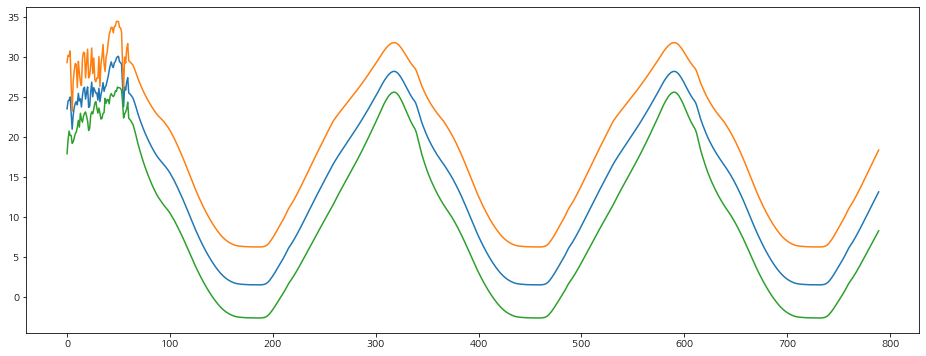

In [104]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)